In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("chipotle_data.csv")
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Toatal quantity ordered


In [5]:
data['quantity'].sum()

4972

### Different types of items in chipotle with number of times ordered

In [6]:
items = data['item_name'].value_counts().reset_index()

In [7]:
items.columns = ['name','counts']
items.head()

,name,counts
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


### top10  orederd items

In [8]:
items.head(10)

,name,counts
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301
5,Steak Bowl,211
6,Chips,211
7,Bottled Water,162
8,Chicken Soft Tacos,115
9,Chicken Salad Bowl,110


In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

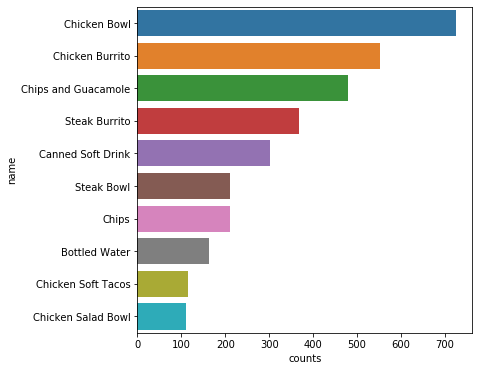

In [10]:
plt.figure(figsize=(6,6))
sb.barplot(y=items.head(10).name,x=items.head(10).counts,data=items.head(10))

### For the most-ordered item, how many items were ordered?

In [11]:
data[data['item_name']=='Chicken Bowl']['quantity'].sum()

761

### top 5 most ordered item how many items were orderd


In [12]:

for i in items.head().name:
#     print(i)
    print(i,'=',data[data['item_name']==i]['quantity'].sum())

Chicken Bowl = 761
Chicken Burrito = 591
Chips and Guacamole = 506
Steak Burrito = 386
Canned Soft Drink = 351


###  What was the most ordered item in the choice_description column?

In [13]:
data['choice_description'].value_counts()

[Diet Coke]                                                                                                      134
[Coke]                                                                                                           123
[Sprite]                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                 40
                                                                                                                ... 
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Guacamole]]                      1
[Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]      1
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans, Rice, Cheese, Gu

In [14]:
### with which item coke is ordered more 
data[data['choice_description']=='[Diet Coke]']['item_name'].value_counts()

Canned Soft Drink    95
6 Pack Soft Drink    24
Canned Soda          15
Name: item_name, dtype: int64

### total how many orders are made

In [15]:
data['order_id'].value_counts().sum()

4622

### which ID is ordered more time and  in what item ordered most of the time

In [16]:
data['order_id'].value_counts().head()

926     23
1483    14
205     12
691     11
1786    11
Name: order_id, dtype: int64

In [17]:
data[data['order_id']==926]['item_name'].value_counts()

Chicken Bowl          9
Steak Bowl            5
Chicken Burrito       4
Steak Burrito         2
Barbacoa Burrito      1
Veggie Bowl           1
Chicken Salad Bowl    1
Name: item_name, dtype: int64

### How much was the revenue for the period in the dataset?

In [18]:
data['price'] = [price.strip('$') for price in data['item_price']]
data.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [19]:
data['price'] = [float(price) for price in data['price']]
data['price'].sum()

34500.16

###  for top items whats the total revenue for each item?


In [20]:
for i in items.name.head():
    rev = data[data['item_name']==i]['price'].sum()
    print('revenue for {} is :'.format(i),rev.round(2))

revenue for Chicken Bowl is : 7342.73
revenue for Chicken Burrito is : 5575.82
revenue for Chips and Guacamole is : 2201.04
revenue for Steak Burrito is : 3851.43
revenue for Canned Soft Drink is : 438.75


### for non top items whats the total revenue for each item?


In [27]:
for i in items.name.tail():
    rev = data[data['item_name']==i]['price'].sum()
    print('revenue for {} is :'.format(i),rev.round(2))

revenue for Bowl is : 29.6
revenue for Salad is : 14.8
revenue for Chips and Mild Fresh Tomato Salsa is : 3.0
revenue for Carnitas Salad is : 8.99
revenue for Veggie Crispy Tacos is : 8.49


### What is the average revenue amount per order?

In [23]:
rev_per_order = data.groupby('order_id')['price'].sum().reset_index()

In [25]:
rev_per_order['price'].sum()

34500.159999999996

In [26]:
rev_per_order['price'].mean()

18.81142857142869